### This is a dataset of Breast Cancer in this I am trying to predict the type of a cancer to the patient. I have use ANN here there are 2 classes in the data set
#### 1 --> Benign

#### 0 --> Malignant

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets

In [25]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [27]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [28]:
# loading the data to a data frame
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [29]:
# print the first 5 rows of the dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
# adding the 'target' column to the data frame
df['label'] = breast_cancer_dataset.target

In [31]:
df.shape

(569, 31)

In [32]:
# getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [33]:
# checking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [34]:
df.duplicated().sum()    # There is no duplicate value in the data

0

In [35]:
# statistical measures about the data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [36]:
# checking the distribution of Target Varibale
df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [39]:
# 1 --> Benign

# 0 --> Malignant

In [40]:
x = df.drop('label',axis=1)
y = df['label']
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [41]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Splitting X Train And Y Train

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [44]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense,Dropout

In [54]:
m1 = Sequential()
m1.add(Dense(46,activation='relu',input_dim=30,name='HL1'))    # hidden layer 1
m1.add(Dense(23,activation='relu',name='HL2'))
m1.add(Dense(1,activation='sigmoid',name='Output_Layer'))

m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
m1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL1 (Dense)                 (None, 46)                1426      
                                                                 
 HL2 (Dense)                 (None, 23)                1081      
                                                                 
 Output_Layer (Dense)        (None, 1)                 24        
                                                                 
Total params: 2531 (9.89 KB)
Trainable params: 2531 (9.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
15/15 [==============================] - 6s 17ms/step - loss: 0.5230 - acc: 0.7385 - val_loss: 0.3853 - val_acc: 0.9298
Epoch 2/30
15/15 [==============================] - 0s 7ms/step - loss: 0.3482 - acc: 0.9604 - val_loss: 0.2788 - val_acc: 0.9561
Epoch 3/30
15/15 [==============================] - 0s 6ms/step - loss: 0.2412 - acc: 0.9582 - val_loss: 0.1955 - val_acc: 0.9561
Epoch 4/30
15/15 [==============================] - 0s 5ms/step - loss: 0.1721 - acc: 0.9604 - val_loss: 0.1436 - val_acc: 0.9649
Epoch 5/30
15/15 [==============================] - 0s 6ms/step - loss: 0.1309 - acc: 0.9670 - val_loss: 0.1150 - val_acc: 0.9649
Epoch 6/30
15/15 [==============================] - 0s 6ms/step - loss: 0.1061 - acc: 0.9714 - val_loss: 0.0958 - val_acc: 0.9737
Epoch 7/30
15/15 [==============================] - 0s 5ms/step - loss: 0.0896 - acc: 0.9846 - val_loss: 0.0845 - val_acc: 0.9825
Epoch 8/30
15/15 [==============================] - 0s 6ms/step - loss: 0.0798 - acc: 0.9

In [56]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epochs
25,0.030542,0.991209,0.050936,0.973684,25
26,0.028939,0.991209,0.048512,0.982456,26
27,0.028036,0.991209,0.047998,0.973684,27
28,0.026704,0.991209,0.049319,0.982456,28
29,0.025551,0.991209,0.049082,0.973684,29


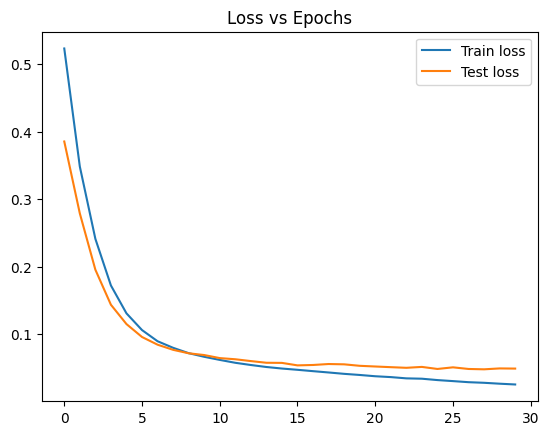

In [57]:
plt.plot(r1['Epochs'],r1['loss'],label='Train loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test loss')
plt.title(f'Loss vs Epochs')
plt.legend()
plt.show()

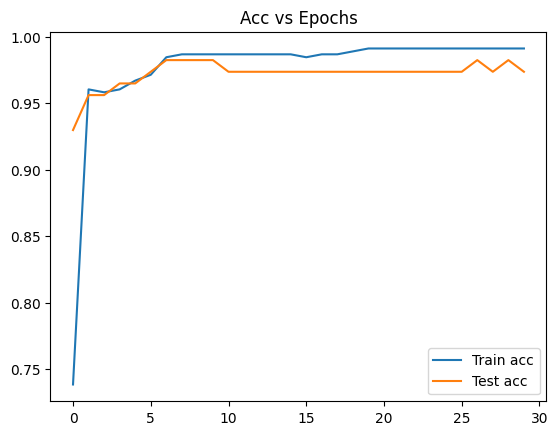

In [58]:
plt.plot(r1['Epochs'],r1['acc'],label='Train acc')
plt.plot(r1['Epochs'],r1['val_acc'],label='Test acc')
plt.title(f'Acc vs Epochs')
plt.legend()
plt.show()

In [59]:
ypred = m1.predict(x_test)
print(ypred[:5])

4/4 [==============================] - 0s 3ms/step
[[0.9991843 ]
 [0.99964535]
 [0.9983181 ]
 [0.99991226]
 [0.99997723]]


In [70]:
ypred_lab = [1 if i>0.5 else 0 for i in ypred]
print(ypred_lab[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [71]:
from sklearn.metrics import *

In [72]:
cm = confusion_matrix(y_test,ypred_lab)
print(cm)
print(classification_report(y_test,ypred_lab))

[[44  2]
 [ 1 67]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.97      0.99      0.98        68

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [74]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = m1.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 29ms/step
[[0.99772257]]
[0]
The tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### This is how we can use Deep learning for the Cancer Prediction